In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import svm
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import scipy
from sklearn.manifold import TSNE
from pandas.plotting import parallel_coordinates
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import svm
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import scipy
from sklearn.manifold import TSNE
import seaborn as sn
from sklearn.datasets import make_friedman1
from sklearn.decomposition import SparsePCA

In [18]:
path = 'project1/AAPL_n.csv'

In [2]:
#dataread

AAPL_df = pd.read_csv(path)
BAC_df = pd.read_csv('project1/BAC_n.csv')
WMT_df = pd.read_csv('project1/WMT_n.csv')
AEO_df = pd.read_csv('project1/AEO_n.csv')
ETH_df = pd.read_csv('project1/ETHUSD-5m-data.csv')

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def doSPCA(data):

  norm = StandardScaler().fit_transform(data)
  spca = SparsePCA( alpha = .5 ,  random_state=123)
  pc = spca.fit_transform(norm) 
  n = spca.transform(norm)
  return n,pc



In [17]:
AAPL_df.head(2)

,Unnamed: 0,Date,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume,Value,Marker,VL
0,0,2/1/2019 9:30,167.058,0.000000,167.150,167.55,166.67,1.319461e+08,1766,166.93,789821,0.000000,no,0.0
1,1,2/1/2019 9:31,167.182,0.000742,167.175,167.42,166.80,2.853055e+07,1143,167.21,170656,0.014957,no,0.0


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def doPCA(data):

  norm = StandardScaler().fit_transform(data)
  pca = PCA()
  newdata = pca.fit_transform(norm)
  return newdata,pca


In [4]:
def doTSNE(data,k):

    l = data.marketClose
    s_data = StandardScaler().fit_transform(data)

    model = TSNE(n_components = 3 , perplexity=k, random_state = 0)

    tsne_data = model.fit_transform(s_data)

    #tsne_data = np.vstack((tsne_data.T, l)).T
    
    return tsne_data

#n = doTSNE(VC_df,20)

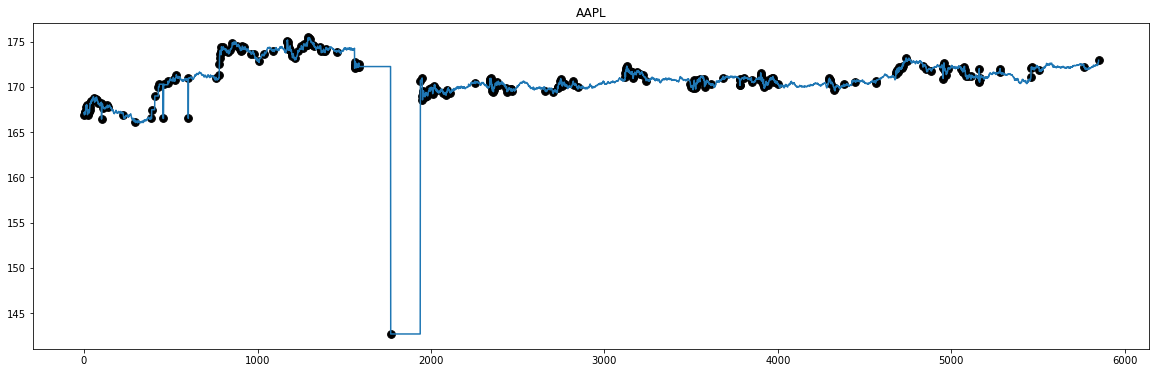

In [94]:
def get_markers(data, t):
    
    val = data['marketClose']
    th = []
    marker = []

    for i in range(len(data)):
        if(i == 0):
            th.append(0)
        else:
            x = val[i] - val[i-1]
            x =  (x / val[i-1] )*100
            th.append(abs(x))
    
    data['Value'] = th
    data['Marker'] = np.where(data['Value'] > t, 'yes', 'no')
    
    df = data[data['Marker'] == 'yes']
    df = df.marketClose
    
    x = pd.DataFrame({"AAPL": AAPL_df["marketClose"]})
    plt.figure(figsize=(20, 6))
    plt.plot(x)
    plt.scatter(df.index, df, marker = 'o', c = 'k' , s = 60, zorder=2)
    plt.title("AAPL")
    plt.show()
        
    return data ,df

data, mk = get_markers(AAPL_df, .1)   
#data.head(2)

In [11]:
len(mk)

19

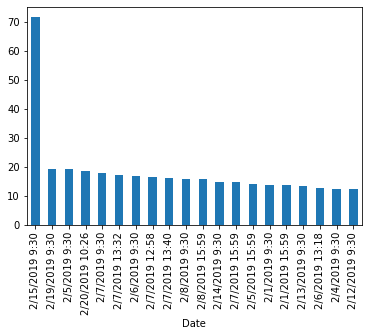

In [56]:
##PCA 
AAPL_df = pd.read_csv(path)

def do(data):
    
    d = data
    data = data.drop(['Date'], axis = 1)

    AAPL = data
    AAPL = StandardScaler().fit_transform(AAPL)
    
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)
    
    X = n
    
    np.shape(X)
    newData_df = pd.DataFrame(data = X,  columns = ['PC' + str(i) for i in range(X.shape[1])], index = d.Date)
    newData_df.head(1)
    df = pd.DataFrame(data = X,columns = data.columns)
    newData_df['Ranking'] = newData_df.apply( lambda x : np.sqrt(x.dot(x)), axis =1)
    ranking_20 = newData_df.Ranking.sort_values(ascending = False)[0:20]
    #print(ranking_20)
    ranking_20.plot.bar()

    plt.show()
    return ranking_20
    
    
rk = do(AAPL_df)   
lk = rk

In [57]:
rk = rk.to_frame().reset_index()
rk = rk.set_index('Date').join(AAPL_df.set_index('Date'))
rk=rk[:20]
pcamk = rk.marketClose
rk[:19].head(1)

,Ranking,Unnamed: 0,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume
Date,,,,,,,,,,,
2/15/2019 9:30,71.627920,3900,171.463,0.000000,171.250,171.70,170.100,7.497340e+08,2796,171.220,4372562
2/19/2019 9:30,19.311510,4290,169.692,0.000000,170.400,170.61,169.430,1.929188e+08,2660,169.720,1136876
2/5/2019 9:30,19.082262,780,172.866,0.000000,172.483,173.00,172.420,1.930336e+08,2535,172.860,1116663
2/20/2019 10:26,18.687463,4736,172.918,0.010312,172.930,172.95,172.840,2.029740e+08,465,172.870,1173816
2/7/2019 9:30,17.693211,1560,172.221,0.000000,172.060,172.40,171.800,1.658473e+08,3187,172.390,962988
2/7/2019 13:32,17.012182,1802,170.958,-0.007334,142.680,171.11,170.955,1.764919e+08,289,171.070,1032372
2/6/2019 9:30,16.692824,1170,174.810,0.000000,174.915,175.18,174.400,1.655814e+08,2275,174.700,947209
2/7/2019 12:58,16.293050,1768,170.493,-0.010034,142.680,170.68,142.680,2.793151e+07,830,170.487,163828
2/7/2019 13:40,16.122138,1810,170.751,-0.008536,142.680,171.00,142.680,5.345034e+06,268,171.000,31303


In [70]:
len(rk)

20

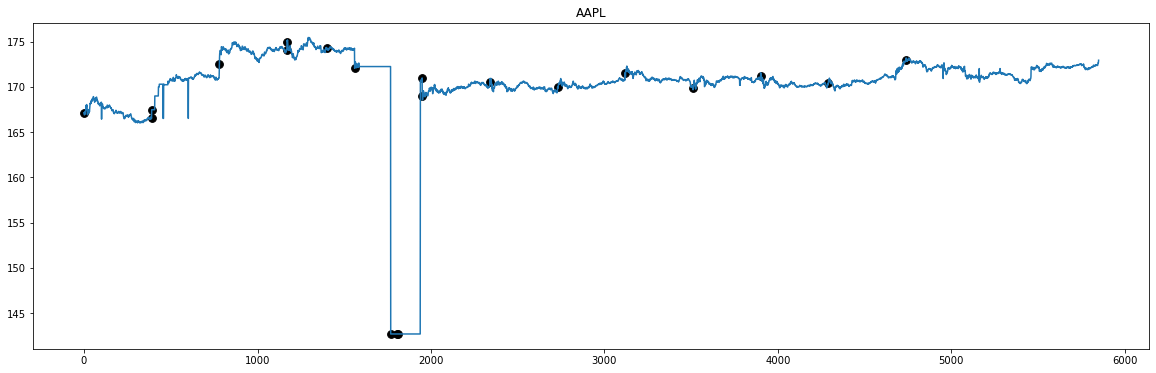

In [71]:
x = pd.DataFrame({"AAPL": AAPL_df["marketClose"]})
plt.figure(figsize=(20, 6))
plt.plot(x)
plt.scatter(rk.iloc[:, 1], rk.marketClose, marker = 'o', c = 'k' , s = 60, zorder=2)
plt.title("AAPL")
plt.show()

C:\Users\chsha\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


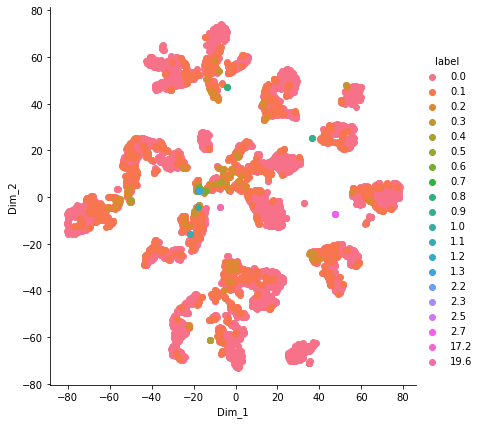

In [15]:
def TSNEPlot(data):
    

    data["VL"] = data["Value"].round(1)
    data = data.drop(['Date'], axis = 1)
    data = data.drop(['Marker'], axis = 1)
    #data = data.dropna()

    l = data.VL
    s_data = StandardScaler().fit_transform(data)

    model = TSNE(n_components = 2 , perplexity=40.0, random_state = 0 , metric='euclidean')

    tsne_data = model.fit_transform(s_data)

    tsne_data = np.vstack((tsne_data.T, l)).T

    tsne_df = pd.DataFrame(data = tsne_data,columns =("Dim_1", "Dim_2", "label"))
 
#plt.figure(figsize=(8, 8))
    sn.FacetGrid(tsne_df, hue ="label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
    plt.show()

TSNEPlot(data)

C:\Users\chsha\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


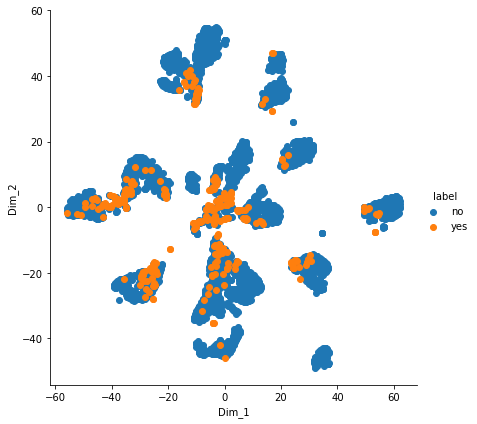

In [95]:
def TSNEPlot(data):
    
    d = data
    data = data.drop(['Date'], axis = 1)
    data = data.drop(['Marker'], axis = 1)
    #data = data.dropna()

    l = d.Marker
    s_data = StandardScaler().fit_transform(data)

    model = TSNE(n_components = 2 , perplexity=100.0, random_state = 0 , metric='euclidean')

    tsne_data = model.fit_transform(s_data)

    tsne_data = np.vstack((tsne_data.T, l)).T

    tsne_df = pd.DataFrame(data = tsne_data,columns =("Dim_1", "Dim_2", "label"))
 
#plt.figure(figsize=(8, 8))
    sn.FacetGrid(tsne_df, hue ="label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
    plt.show()

TSNEPlot(data)

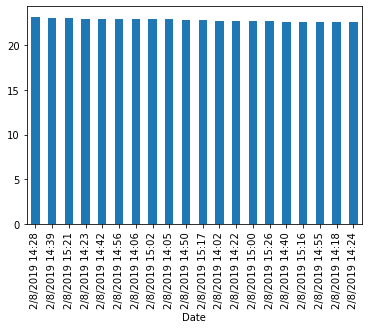

In [73]:
##TSNE


def do(data):
    
    d = data
    data = data.drop(['Date'], axis = 1)

    AAPL = data
    AAPL = StandardScaler().fit_transform(AAPL)
    
    n = doTSNE(data,70)
    PC = n
    PC_df = pd.DataFrame(data=PC)
    
    X = n
    
    np.shape(X)
    newData_df = pd.DataFrame(data = X,  columns = ['PC' + str(i) for i in range(X.shape[1])], index = d.Date)
    newData_df.head(1)
    df = pd.DataFrame(data = X)
    newData_df['Ranking'] = newData_df.apply( lambda x : np.sqrt(x.dot(x)), axis =1)
    ranking_20 = newData_df.Ranking.sort_values(ascending = False)[0:20]
    #print(ranking_20)
    ranking_20.plot.bar()

    plt.show()
    return ranking_20
    
    
rk = do(AAPL_df)   


In [77]:
rk = rk.to_frame().reset_index()
rk = rk.set_index('Date').join(AAPL_df.set_index('Date'))
rk=rk[:20]
tsnemk = rk.marketClose
rk[:19].head(1)

,Ranking,Unnamed: 0,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume
Date,,,,,,,,,,,
2/8/2019 14:28,23.183546,2248,170.417,0.008838,170.4,170.442,170.4,2601415.453,121,170.404,15265


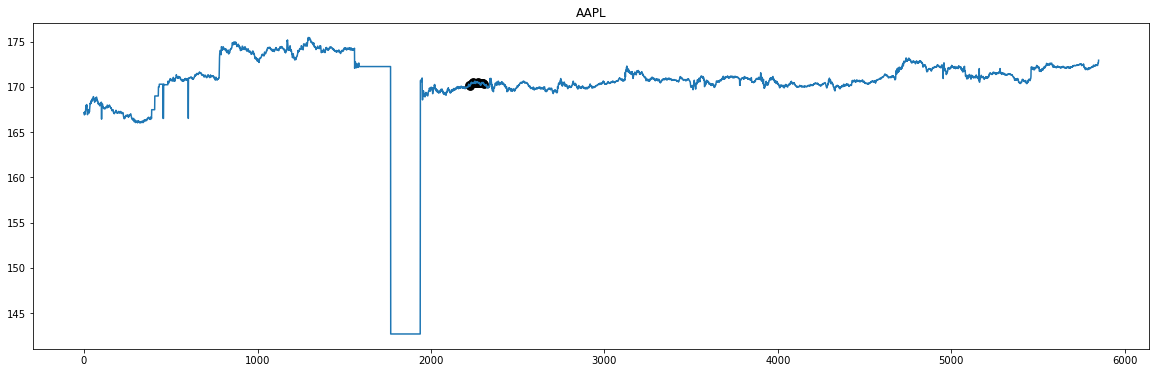

In [78]:
x = pd.DataFrame({"AAPL": AAPL_df["marketClose"]})
plt.figure(figsize=(20, 6))
plt.plot(x)
plt.scatter(rk.iloc[:, 1], rk.marketClose, marker = 'o', c = 'k' , s = 60, zorder=2)
plt.title("AAPL")
plt.show()

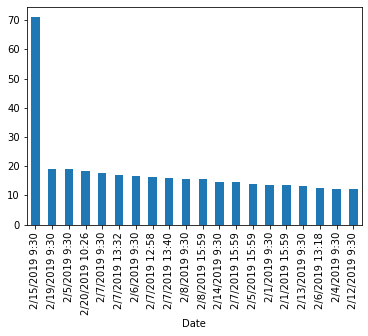

In [90]:
##PCA 
AAPL_df = pd.read_csv(path)

def do(data):
    
    d = data
    data = data.drop(['Date'], axis = 1)

    AAPL = data
    AAPL = StandardScaler().fit_transform(AAPL)
    
    n,pca = doSPCA(data)
    PC = n
    PC_df = pd.DataFrame(data=PC)
    
    X = n
    
    np.shape(X)
    newData_df = pd.DataFrame(data = X,  columns = ['PC' + str(i) for i in range(X.shape[1])], index = d.Date)
    newData_df.head(1)
    df = pd.DataFrame(data = X,columns = data.columns)
    newData_df['Ranking'] = newData_df.apply( lambda x : np.sqrt(x.dot(x)), axis =1)
    ranking_20 = newData_df.Ranking.sort_values(ascending = False)[0:20]
    #print(ranking_20)
    ranking_20.plot.bar()

    plt.show()
    return ranking_20
    
    
rk = do(AAPL_df)   
lk = rk

In [91]:
rk = rk.to_frame().reset_index()
rk = rk.set_index('Date').join(AAPL_df.set_index('Date'))
rk=rk[:20]
spcamk = rk.marketClose
rk[:19].head(1)

,Ranking,Unnamed: 0,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume
Date,,,,,,,,,,,
2/15/2019 9:30,70.918731,3900,171.463,0.0,171.25,171.7,170.1,749733973.0,2796,171.22,4372562


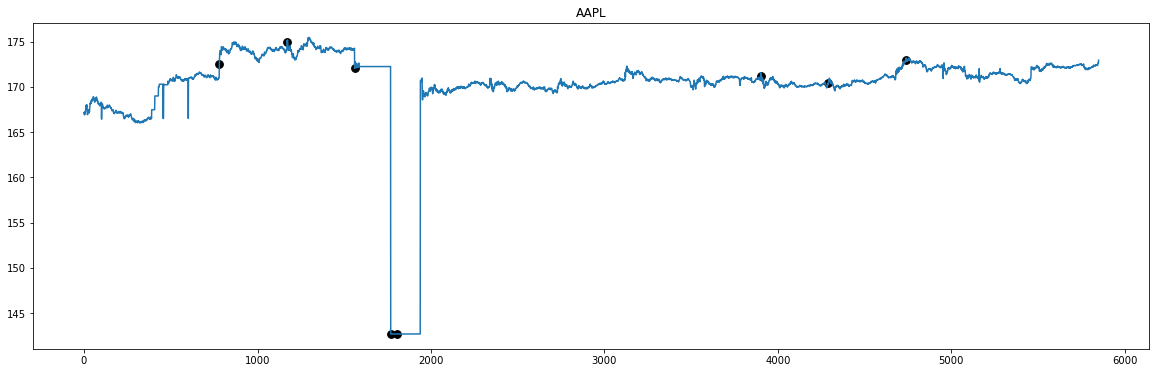

In [93]:
x = pd.DataFrame({"AAPL": AAPL_df["marketClose"]})
plt.figure(figsize=(20, 6))
plt.plot(x)
plt.scatter(rk[:8].iloc[:, 1], rk[:8].marketClose, marker = 'o', c = 'k' , s = 60, zorder=2)
plt.title("AAPL")
plt.show()

In [ ]:
data["VL"] = data["Value"].round(1)
d = data
data = data.drop(['Date'], axis = 1)
data = data.drop(['Marker'], axis = 1)
data = data.dropna()

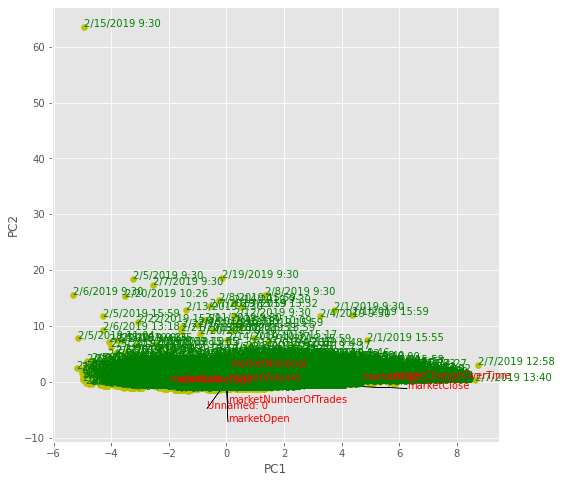

In [14]:
def Biplot(data):
    
    d = data
    data = data.drop(['Date'], axis = 1)
    
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)

    plt.style.use('ggplot')
    fig=plt.figure(figsize=(8,8))

    for i in range(len(n)):
        plt.scatter(n[i,0],n[i,1], c = 'y')
        plt.text(n[i,0],n[i,1],d.Date[i], c = 'g')

    sc = 10
    for k in range(PC_df.shape[1]):
        plt.text(  PC_df.iloc[k,0]*sc + .05  ,  PC_df.iloc[k,1]*sc + .05 , PC_df.index[k] , c= 'r')
        plt.arrow( 0,0,  PC_df.iloc[k,0]*sc + .05  ,  PC_df.iloc[k,1]*sc + .05   , color= 'k')
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    
Biplot(AAPL_df)

<ipython-input-26-5429b1e96164>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['20MA'] = data.marketHigh.rolling(window=10).mean()


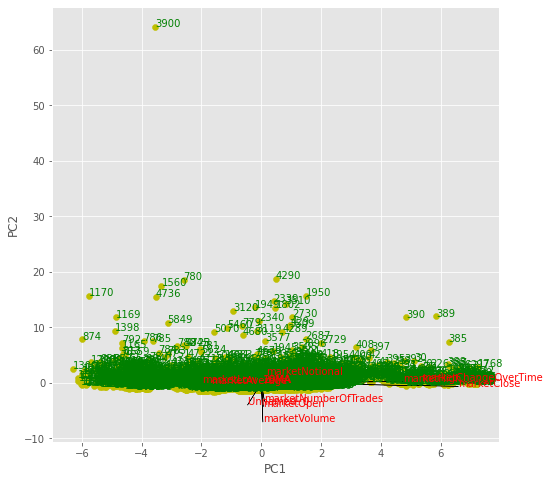

In [26]:
AAPL_df = pd.read_csv('project1/AAPL_n.csv')

def Biplotfet(data):
    
    data['10MA'] = data.marketHigh.rolling(window=10).mean()
    data = data.dropna()

    data['20MA'] = data.marketHigh.rolling(window=20).mean()
    data = data.dropna()
    
    d = data
    data = data.drop(['Date'], axis = 1)
    
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)

    plt.style.use('ggplot')
    fig=plt.figure(figsize=(8,8))

    for i in range(len(n)):
        plt.scatter(n[i,0],n[i,1], c = 'y')
        plt.text(n[i,0],n[i,1],data.index[i], c = 'g')

    sc = 10
    for k in range(PC_df.shape[1]):
        plt.text(  PC_df.iloc[k,0]*sc + .05  ,  PC_df.iloc[k,1]*sc + .05 , PC_df.index[k] , c= 'r')
        plt.arrow( 0,0,  PC_df.iloc[k,0]*sc + .05  ,  PC_df.iloc[k,1]*sc + .05   , color= 'k')
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    
Biplotfet(AAPL_df)

In [ ]:
##PCA 


def do(data):
    
    
    
    data = data.dropna()
    d = data
    data = data.drop(['Date'], axis = 1)

    
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)
    
    X = n
    
    np.shape(X)
    newData_df = pd.DataFrame(data = X,  columns = ['PC' + str(i) for i in range(X.shape[1])], index = d.Date)
    newData_df.head(1)
    df = pd.DataFrame(data = X,columns = data.columns)
    newData_df['Ranking'] = newData_df.apply( lambda x : np.sqrt(x.dot(x)), axis =1)
    ranking_20 = newData_df.Ranking.sort_values(ascending = False)[0:20]
    #print(ranking_20)
    ranking_20.plot.bar()

    plt.show()
    
    
do(AAPL_df)   


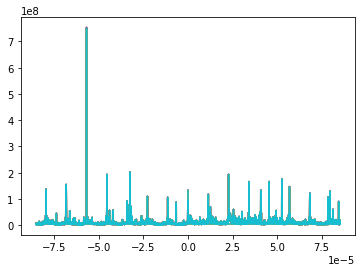

In [96]:
import scipy.fftpack
import pylab
AAPL_df = pd.read_csv('project1/AAPL_n.csv')

data = AAPL_df
data = data.drop(['Date'], axis = 1)

y = data

Y    = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), 5850 )

pylab.figure()
pylab.plot( freq, np.abs(Y) )
pylab.show()



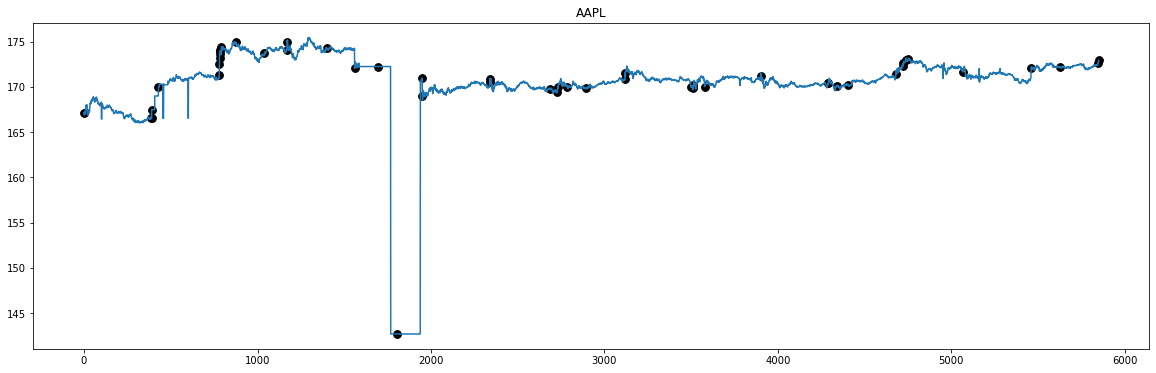

In [98]:
p = []
Yt = np.abs(Y)
for i in range(len(Yt)):
    p.append(np.sum(Yt[i]))
np.shape(p)

AAPL_df["Real"] = p
df = AAPL_df.sort_values(by=['Real'], ascending=False)
df["Value"] = "No"
#df.head(2)

x = pd.DataFrame({"AAPL": AAPL_df["marketClose"]})
de = df[:50]
plt.figure(figsize=(20, 6))
plt.plot(x)
plt.scatter(de.index, de.marketClose, marker = 'o', c = 'k' , s = 60, zorder=2)
fftmk = de.marketClose[:19]
plt.title("AAPL")
plt.show()


In [13]:
len(de)

50